In [134]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
import plotly.offline as py
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import tensorflow as tf
import keras as ke
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

In [135]:
cb_df = pd.read_csv('cyberbullying_tweets.csv')
cb_df = cb_df.iloc[1:, :]
cb_df.head()

tweet_text cyberbullying_type
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
5  @Raja5aab @Quickieleaks Yes, the test of god i...  not_cyberbullying

In [136]:
cb_df.shape

(11957, 2)

In [137]:
stop_words = set(stopwords.words('english'))

In [138]:
def data_processing(tweet_text):
    tweet_text = tweet_text.lower()
    tweet_text = re.sub(r'https\S+|www\S+http\S+', '', tweet_text, flags = re.MULTILINE)
    tweet_text = re.sub(r'\@w+|\#', '', tweet_text)
    tweet_text = re.sub(r'[^\w\s]', '', tweet_text)
    tweet_text = re.sub('[0-9]+', '', tweet_text)
    tweet_text_tokens = word_tokenize(tweet_text)
    filtered_tweet_text = [word for word in tweet_text_tokens if not word_tokenize in stop_words]
    return " ".join(filtered_tweet_text)

In [139]:
cb_df.tweet_text = cb_df['tweet_text'].apply(data_processing)

In [140]:
cb_df = cb_df.drop_duplicates('tweet_text')
cb_df

tweet_text cyberbullying_type
1      why is aussietv so white mkr theblock imaceleb...  not_cyberbullying
2      xochitlsuckkks a classy whore or more red velv...  not_cyberbullying
3      jason_gio meh p thanks for the heads up but no...  not_cyberbullying
4      rudhoeenglish this is an isis account pretendi...  not_cyberbullying
5      rajaaab quickieleaks yes the test of god is th...  not_cyberbullying
...                                                  ...                ...
11953  if white brown and black people can vote for t...          ethnicity
11954  dumb nigger fuck always comes in my room uses ...          ethnicity
11955  slinkyslappa chickentastey fuck you dumb bitch...          ethnicity
11956  racism makes you look dumb as fuck look at all...          ethnicity
11957  somebody must have kicked her dog smdh rt meez...          ethnicity

[11822 rows x 2 columns]

In [149]:
le = preprocessing.LabelEncoder()
cb_df['cyberbullying_type'] = le.fit_transform(cb_df.cyberbullying_type.values)
cb_df['cyberbullying_type']

1        3
2        3
3        3
4        3
5        3
        ..
11953    1
11954    1
11955    1
11956    1
11957    1
Name: cyberbullying_type, Length: 11822, dtype: int64

In [150]:
cb_df["cyberbullying_type"].value_counts()

5    1995
1    1994
2    1992
0    1988
3    1978
4    1875
Name: cyberbullying_type, dtype: int64

In [151]:
lem = WordNetLemmatizer()
def lemmatizing(data):
    tweet_text = [lem.lemmatize(word) for word in data]
    return data

In [152]:
cb_df['tweet_text'] = cb_df['tweet_text'].apply(lambda x: lemmatizing(x))

In [153]:
cb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11822 entries, 1 to 11957
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          11822 non-null  object
 1   cyberbullying_type  11822 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 535.1+ KB


In [154]:
all_words = cb_df['tweet_text'].str.split(expand=True).unstack().value_counts()
py.init_notebook_mode()
data = [go.Bar(
            x = all_words.index.values[0:50],
            y = all_words.values[0:50],
            marker= dict(colorscale='RdBu',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (Uncleaned) Word frequencies in the training dataset'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')
plt.show()

<AxesSubplot: xlabel='cyberbullying_type', ylabel='count'>

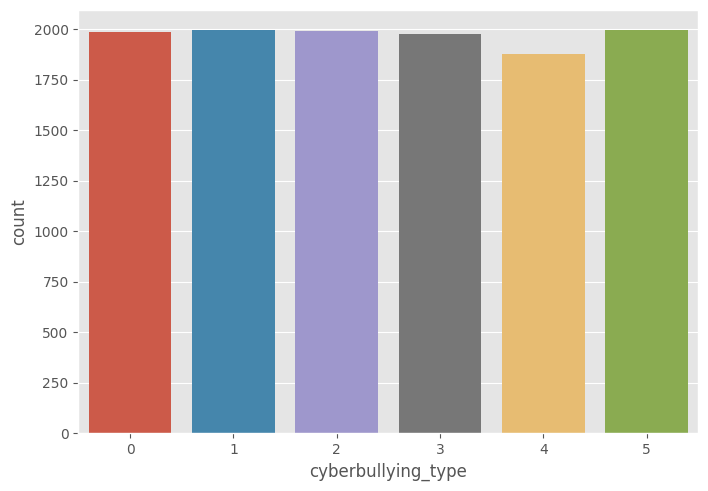

In [155]:
fig = plt.figure(figsize=(8,5.5))
sns.countplot(x='cyberbullying_type', data= cb_df)

In [156]:
lenc = LabelEncoder()
cb_df.cyberbullying_type = lenc.fit_transform(cb_df.cyberbullying_type)
lenc.classes_

array([0, 1, 2, 3, 4, 5], dtype=int64)

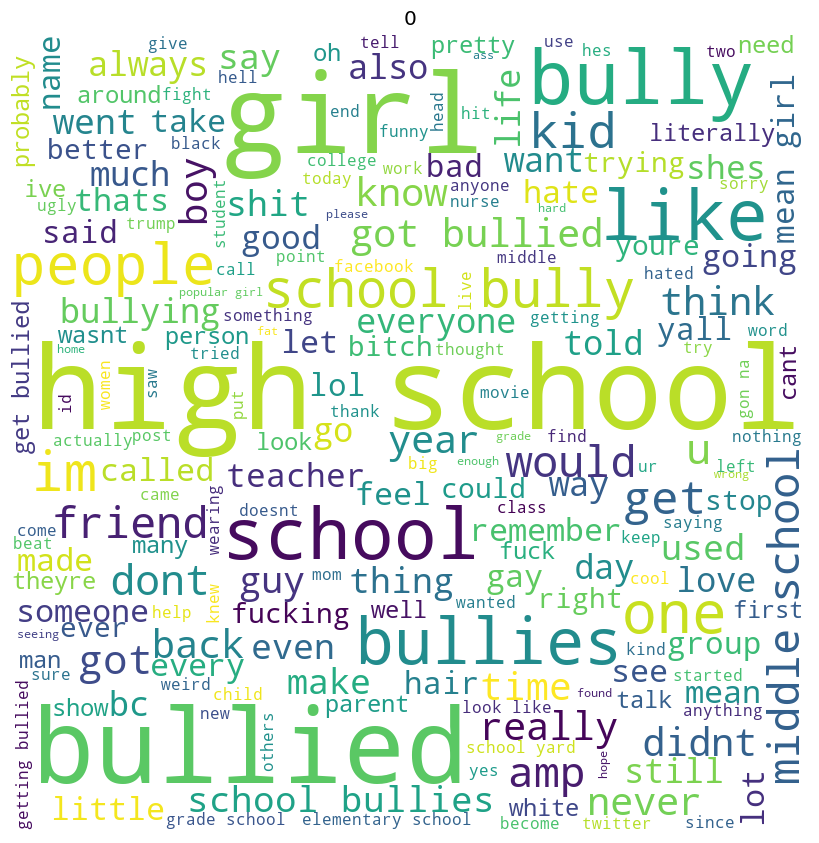

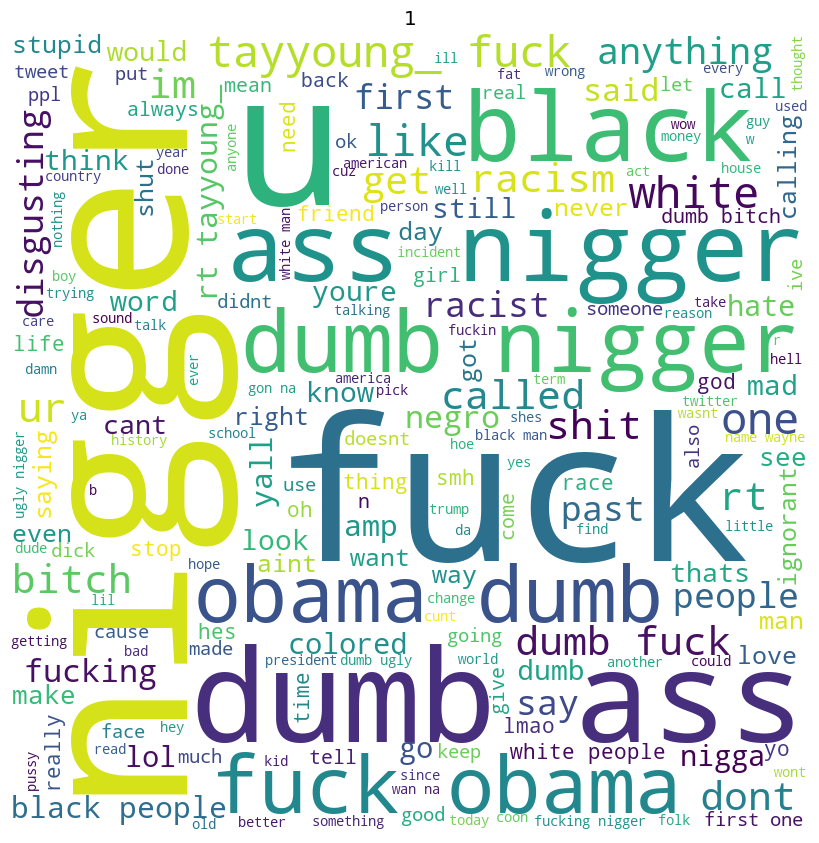

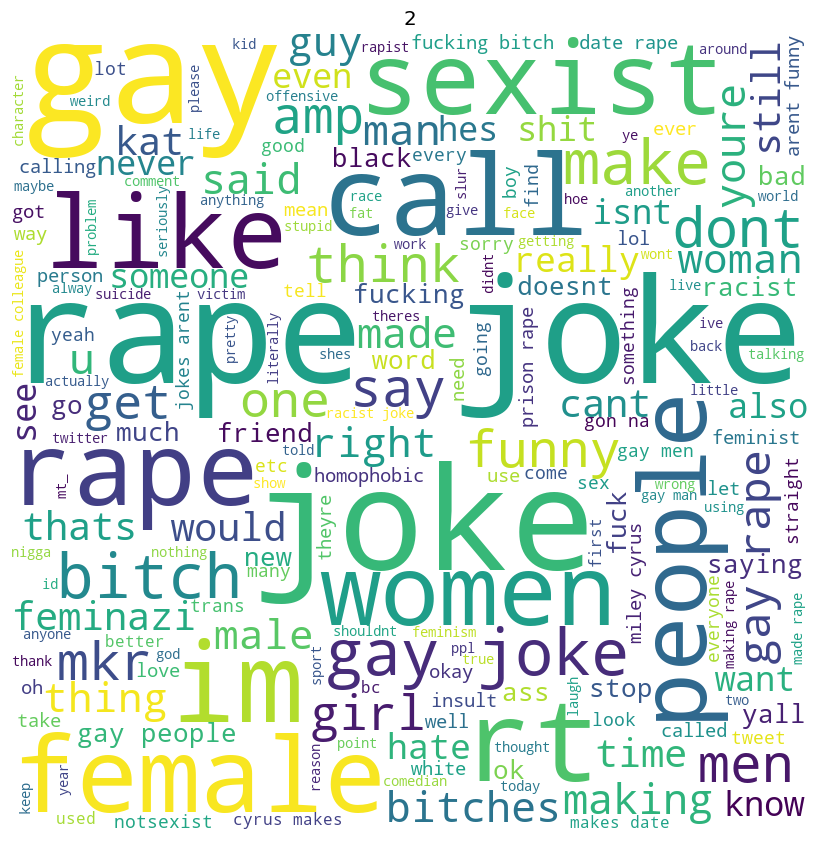

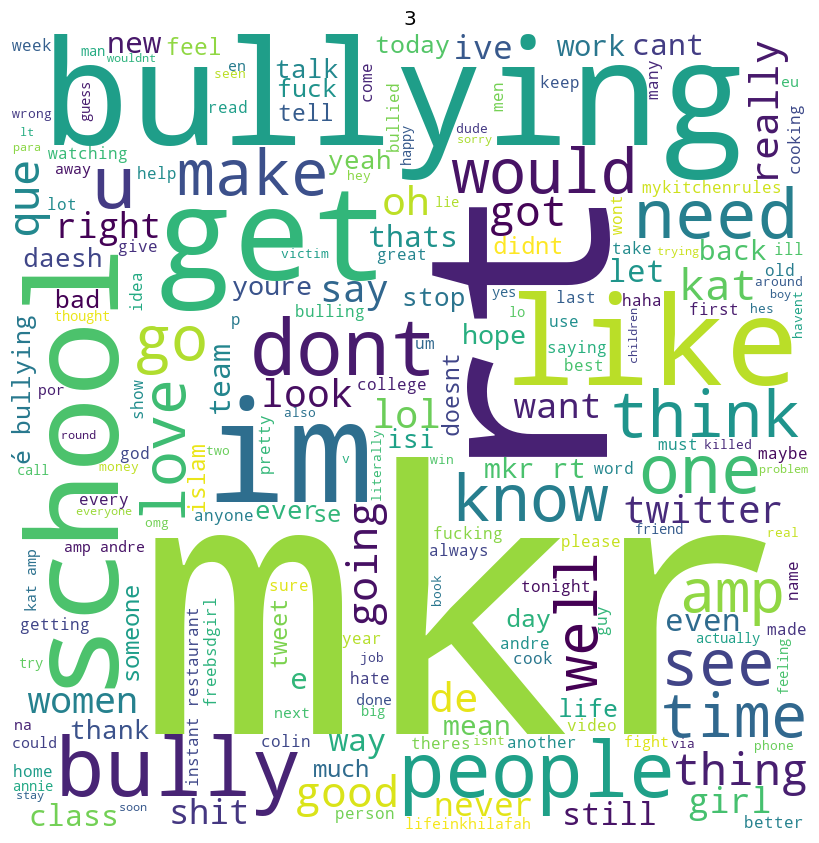

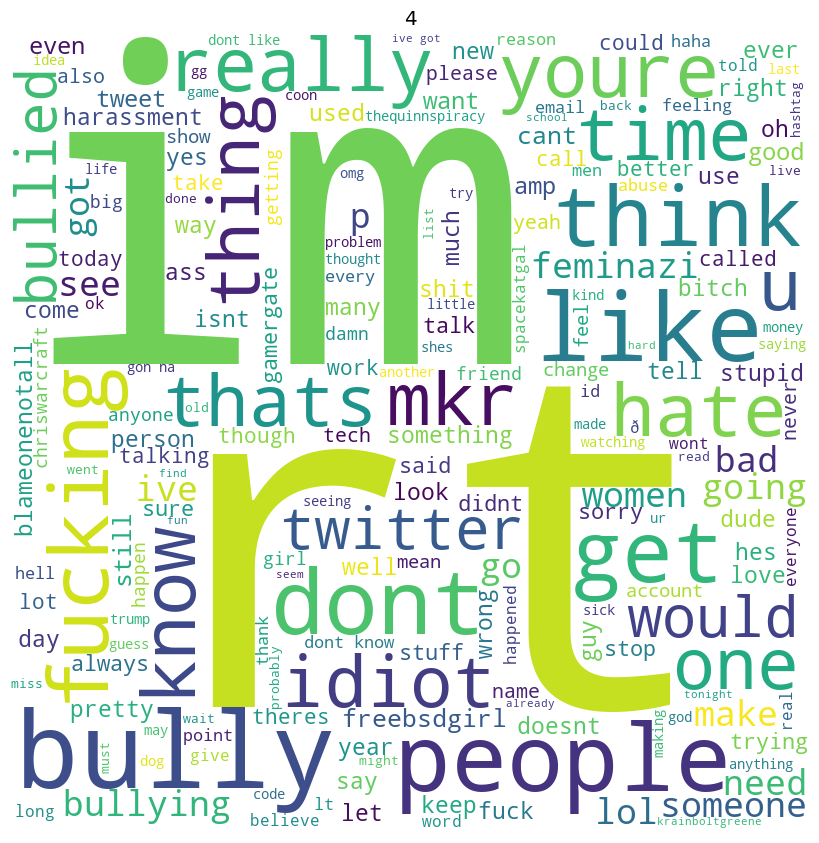

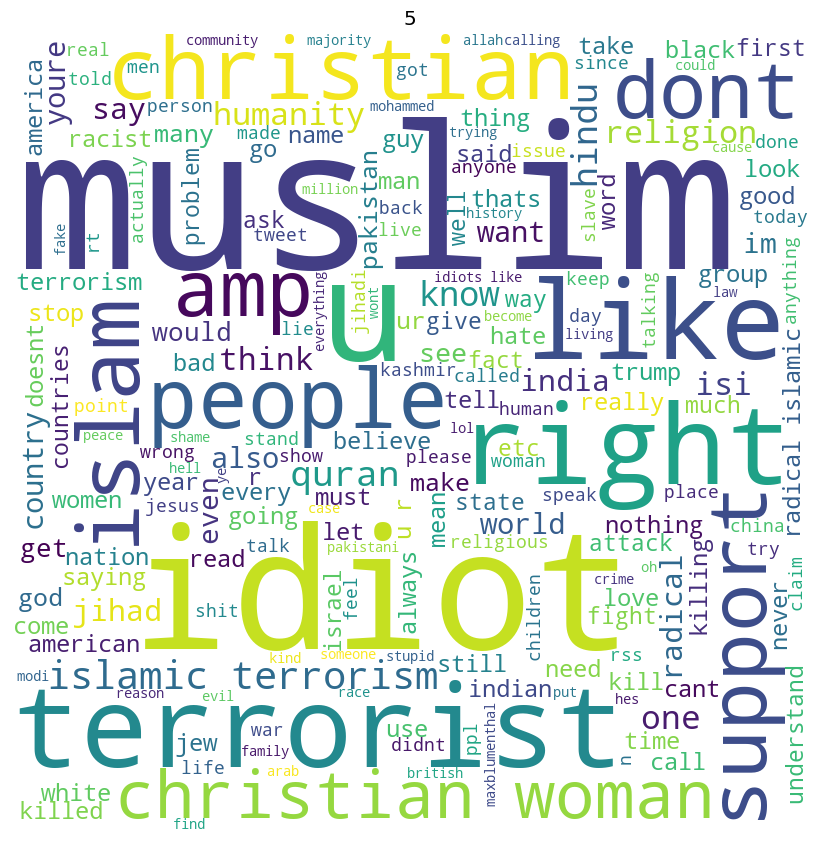

In [157]:
for c in range(len(lenc.classes_)):
    string = ""
    for i in cb_df[cb_df.cyberbullying_type == c].tweet_text.values:
        string = string + " " + i.strip()
    
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(stop_words),
                min_font_size = 10).generate(string)
 
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(lenc.classes_[c])
    plt.show()
    del string

In [158]:
vec = TfidfVectorizer(ngram_range=(1,3)).fit(cb_df['tweet_text'])

In [159]:
feature_names = vec.get_feature_names_out()

In [160]:
x = cb_df['tweet_text']
y = cb_df['cyberbullying_type']
X = vec.transform(x)

In [161]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [162]:
print ("Shapes")
print (train_x.shape)
print (test_x.shape)
print (train_y.shape)
print (test_y.shape)

Shapes
(8275, 370560)
(3547, 370560)
(8275,)
(3547,)


In [163]:
logreg =LogisticRegression()
logreg.fit(train_x, train_y)
logreg_predict = logreg.predict(test_x)
logreg_acc = accuracy_score(logreg_predict, test_y)
logreg_rec = recall_score(logreg_predict, test_y, average='micro')
print("accuracy:{:.2f}%".format(logreg_acc*100))
print("recall:{:.2f}%".format(logreg_rec*100))

accuracy:80.77%
recall:80.77%


c:\Users\juane\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [164]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(train_x, train_y)
rfc_predict = rfc.predict(test_x)
rfc_acc = accuracy_score(rfc_predict, test_y)
rfc_rec = recall_score(rfc_predict, test_y, average='micro')
print("accuracy:{:.2f}%".format(rfc_acc*100))
print("recall:{:.2f}%".format(rfc_rec*100))

accuracy:76.06%
recall:76.06%


In [165]:
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
dtc_predict = dtc.predict(test_x)
dtc_acc = accuracy_score(dtc_predict, test_y)
dtc_rec = recall_score(dtc_predict, test_y, average='micro')
print("accuracy:{:.2f}%".format(dtc_acc*100))
print("recall:{:.2f}%".format(dtc_rec*100))

accuracy:79.64%
recall:79.64%


In [166]:
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)
knn_predict = knn.predict(test_x)
knn_acc = accuracy_score(knn_predict, test_y)
knn_rec = recall_score(knn_predict, test_y, average='micro')
print("accuracy:{:.2f}%".format(knn_acc*100))
print("recall:{:.2f}%".format(knn_rec*100))

accuracy:64.39%
recall:64.39%


In [167]:
nbs = MultinomialNB()
nbs.fit(train_x, train_y)
nbs_predict = nbs.predict(test_x)
nbs_acc = accuracy_score(nbs_predict, test_y)
nbs_rec = recall_score(nbs_predict, test_y, average='micro')
print("accuracy:{:.2f}%".format(nbs_acc*100))
print("recall:{:.2f}%".format(nbs_rec*100))

accuracy:69.75%
recall:69.75%


In [168]:
clf = LinearSVC()
clf.fit(train_x, train_y)
clf_predict = clf.predict(test_x)
clf_acc = accuracy_score(clf_predict, test_y)
clf_rec = recall_score(clf_predict, test_y, average='micro')
print("accuracy:{:.2f}%".format(clf_acc*100))
print("recall:{:.2f}%".format(clf_rec*100))

accuracy:82.83%
recall:82.83%


In [180]:
vec = CountVectorizer(binary=True, stop_words="english")
X = vec.fit_transform(cb_df["tweet_text"])
df_tf = pd.DataFrame(X.todense(), columns=vec.get_feature_names_out())
df_tf

__  ___  ____  ________  ___itsmeee  ___mntana  __citgo  __enimey__  \
0       0    0     0         0           0          0        0           0   
1       0    0     0         0           0          0        0           0   
2       0    0     0         0           0          0        0           0   
3       0    0     0         0           0          0        0           0   
4       0    0     0         0           0          0        0           0   
...    ..  ...   ...       ...         ...        ...      ...         ...   
11817   0    0     0         0           0          0        0           0   
11818   0    0     0         0           0          0        0           0   
11819   0    0     0         0           0          0        0           0   
11820   0    0     0         0           0          0        0           0   
11821   0    0     0         0           0          0        0           0   

       __qn  _adams_j  ...  ᵗʳᵃⁱˡ  ᵗʳⁱᵍᵍᵉʳ  ᶠⁱⁿᵍᵉʳ  ハワイニュース  ハワイニュースナウ  \
0         0         0  ...      0        0       0        0          0   
1         0         0  ...      0        0       0        0          0   
2         0         0  ...      0        0       0        0          0   
3         0         0  ...      0        0       0        0          0   
4         0         0  ...      0        0       0        0          0   
...     ...       ...  ...    ...      ...     ...      ...        ...   
11817     0         0  ...      0        0       0        0          0   
11818     0         0  ...      0        0       0        0          0   
11819     0         0  ...      0        0       0        0          0   
11820     0         0  ...      0        0       0        0          0   
11821     0         0  ...      0        0       0        0          0   

       ハワイリアルニュース  ハワイロールニュース  中川大志  少年的你  石井杏奈  
0               0           0     0     0     0  
1               0           0     0     0     0  
2               0           0     0     0     0  
3               0           0     0     0     0  
4               0           0     0     0     0  
...           ...         ...   ...   ...   ...  
11817           0           0     0     0     0  
11818           0           0     0     0     0  
11819           0           0     0     0     0  
11820           0           0     0     0     0  
11821           0           0     0     0     0  

[11822 rows x 25967 columns]

In [181]:
train_x, test_x, train_y, test_y = train_test_split(df_tf, cb_df["cyberbullying_type"], test_size=0.3, random_state=123)
# convert numpy arrays to data frames
df_train_x = pd.DataFrame(train_x, columns=df_tf.columns)
df_test_x = pd.DataFrame(test_x, columns=df_tf.columns)
df_train_y = pd.DataFrame(train_y, columns=["cyberbullying_type"])
df_test_y = pd.DataFrame(test_y, columns=["cyberbullying_type"])

In [182]:
input_dim = train_x.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [183]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

In [184]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                259680    
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 259,691
Trainable params: 259,691
Non-trainable params: 0
_________________________________________________________________


In [197]:
history = model.fit(train_x, train_y,
                     epochs=50,
                     verbose=False,
                     validation_data=(test_x, test_y),
                     batch_size=5)

In [198]:
history.params

{'verbose': False, 'epochs': 50, 'steps': 1655}

In [199]:
history.history

{'loss': [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'accuracy': [0.1683383733034134,
  0.1683383733034134,
  0.1683383733034134,
  0.1683383733034134,
  0.1683383733034134,
  0.1683383733034134,
  0.1683383733034134,
  0.1683383733034134,
  0.1683383733034134,
  0.1683383733034134,
  0.1683383733034134,
  0.1683383733034134,
  0.1683383733034134,
  0.1683383733034134,
  0.1683383733034134,
  0.1683383733034134,
  0.1683383733034134,
  0.1683383733034134,
  0.1683383733034134,
  0.1683383733034134,
  0.1683383733034134,
  0.1683383733034134,
  0.1683383733034134,
  0.1683383733034134,
  0.1683383733034134,
  0.1683383733034134,
  0.1683383733034134,
  0.1683383733034134,
  0.168338373

In [200]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

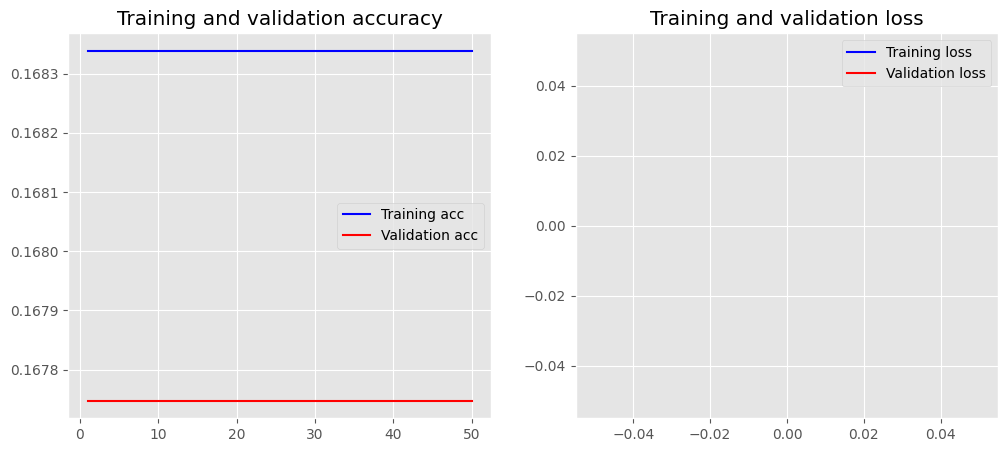

In [201]:
plot_history(history)